In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
npInputDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npInputDataset.npy")
npXTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npXTargetDataset.npy")
npYTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npYTargetDataset.npy")
npUTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npUTargetDataset.npy")
npVTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npVTargetDataset.npy")
npAccXTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npXTargetDataset.npy")
npAccYTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npAccYTargetDataset.npy")
npRhoTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npRhoTargetDataset.npy")
npPTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npPTargetDataset.npy")
npCollidingTotal = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npCollidingTotal.npy")

In [3]:
npXTargetDataset = np.expand_dims(npXTargetDataset, axis=-1)
npYTargetDataset= np.expand_dims(npYTargetDataset, axis=-1)
npUTargetDataset= np.expand_dims(npUTargetDataset, axis=-1)
npVTargetDataset= np.expand_dims(npVTargetDataset, axis=-1)
npAccXTargetDataset = np.expand_dims(npAccXTargetDataset, axis=-1)
npAccYTargetDataset= np.expand_dims(npAccYTargetDataset, axis=-1)
npRhoTargetDataset =np.expand_dims(npRhoTargetDataset, axis=-1)
npPTargetDataset = np.expand_dims(npPTargetDataset, axis=-1)
npCollidingTotal = np.expand_dims(npCollidingTotal,axis=-1)

In [4]:
np.random.RandomState(42)

In [5]:
# The number of data
NData = 100

# The number of particles
NParticles = 100

# The number of TimeSteps
NTimeSteps = 200

# The number of parameters
NParameters = 4

# The number of Targets
NTargets = 8

# Input Dataset

In [6]:
# StandardScalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = StandardScaler()
InputDataset= scaler.fit_transform(npInputDataset.reshape(-1,4))
InputDataset =InputDataset[:,:].reshape(NData,NTimeSteps,NParticles,NParameters)


In [7]:
TargetName = ["X","Y","U","V","AccX","AccY","Rho","P"]

In [8]:
npInputDataset.shape

(100, 200, 100, 4)

In [64]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(filters = 1, kernel_size=3,padding ='same', activation='relu', input_shape = (200,100,4)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(200))
model1.add(keras.layers.Dropout(0.4))
model1.add(keras.layers.Dense(20000))
model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 200, 100, 1)       37        
_________________________________________________________________
flatten_17 (Flatten)         (None, 20000)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 200)               4000200   
_________________________________________________________________
dropout_17 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 20000)             4020000   
Total params: 8,020,237
Trainable params: 8,020,237
Non-trainable params: 0
_________________________________________________________________


In [65]:
Input=npInputDataset
target=npXTargetDataset.reshape(-1,20000)

In [66]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Input,target, test_size=0.25, random_state=42)
X_train1, X_Val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size = 0.25, random_state = 42)

model1.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['MSE'])
#     checkpoint_cb1 = keras.callbacks.ModelCheckpoint('Model1.h5')
early_stopping_cb1 = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history1 = model1.fit(X_train1,y_train1,epochs=3000, validation_data=(X_Val1,y_val1),callbacks=[early_stopping_cb1,])#checkpoint_cb1,

Epoch 1/3000
2/2 [==============================] - 1s 205ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 2/3000
2/2 [==============================] - 0s 108ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 3/3000
2/2 [==============================] - 0s 109ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 4/3000
2/2 [==============================] - 0s 118ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 5/3000
2/2 [==============================] - 0s 102ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 6/3000
2/2 [==============================] - 0s 107ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 7/3000
2/2 [==============================] - 0s 103ms/step - loss: 0.0023 - MSE: 0.0023 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 8/3000
2/2 [==============================] - 0s 116ms/step - loss: 0.

Epoch 60/3000
2/2 [==============================] - 0s 97ms/step - loss: 3.2847e-04 - MSE: 3.2847e-04 - val_loss: 1.4602e-04 - val_MSE: 1.4602e-04
Epoch 61/3000
2/2 [==============================] - 0s 102ms/step - loss: 3.1918e-04 - MSE: 3.1918e-04 - val_loss: 1.3952e-04 - val_MSE: 1.3952e-04
Epoch 62/3000
2/2 [==============================] - 0s 101ms/step - loss: 3.0961e-04 - MSE: 3.0961e-04 - val_loss: 1.3394e-04 - val_MSE: 1.3394e-04
Epoch 63/3000
2/2 [==============================] - 0s 129ms/step - loss: 3.0381e-04 - MSE: 3.0381e-04 - val_loss: 1.3163e-04 - val_MSE: 1.3163e-04
Epoch 64/3000
2/2 [==============================] - 0s 126ms/step - loss: 3.0071e-04 - MSE: 3.0071e-04 - val_loss: 1.3123e-04 - val_MSE: 1.3123e-04
Epoch 65/3000
2/2 [==============================] - 0s 100ms/step - loss: 2.9062e-04 - MSE: 2.9062e-04 - val_loss: 1.3060e-04 - val_MSE: 1.3060e-04
Epoch 66/3000
2/2 [==============================] - 0s 120ms/step - loss: 2.9759e-04 - MSE: 2.9759e-04 - v

In [54]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(filters = 1, kernel_size=3,padding ='same', activation='relu', input_shape = (200,100,4)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100))
model2.add(keras.layers.Dropout(0.4))
model2.add(keras.layers.Dense(20000))
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 200, 100, 3)       111       
_________________________________________________________________
flatten_13 (Flatten)         (None, 60000)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               6000100   
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 20000)             2020000   
Total params: 8,020,211
Trainable params: 8,020,211
Non-trainable params: 0
_________________________________________________________________


In [55]:
Input=npInputDataset
target=npYTargetDataset.reshape(-1,20000)

In [56]:


X_train2, X_test2, y_train2, y_test2 = train_test_split(Input,target , test_size=0.25, random_state=42)
X_train2, X_Val2, y_train2, y_val2 = train_test_split(X_train1, y_train1, test_size = 0.25, random_state = 42)

model2.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=1e-5), metrics=['MSE'])
#     checkpoint_cb2 = keras.callbacks.ModelCheckpoint('Model2.h5')
early_stopping_cb2 = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history2 = model2.fit(X_train2,y_train2,epochs=60, validation_data=(X_Val2,y_val2),callbacks=[early_stopping_cb2])


Epoch 1/60
2/2 [==============================] - 1s 185ms/step - loss: 0.0054 - MSE: 0.0054 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 2/60
2/2 [==============================] - 0s 97ms/step - loss: 0.0032 - MSE: 0.0032 - val_loss: 0.0021 - val_MSE: 0.0021
Epoch 3/60
2/2 [==============================] - 0s 86ms/step - loss: 0.0028 - MSE: 0.0028 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 4/60
2/2 [==============================] - 0s 107ms/step - loss: 0.0029 - MSE: 0.0029 - val_loss: 0.0022 - val_MSE: 0.0022


In [57]:

X = model1.predict(X_test1).reshape(-1,200,100)
Y = model2.predict(X_test2).reshape(-1,200,100)

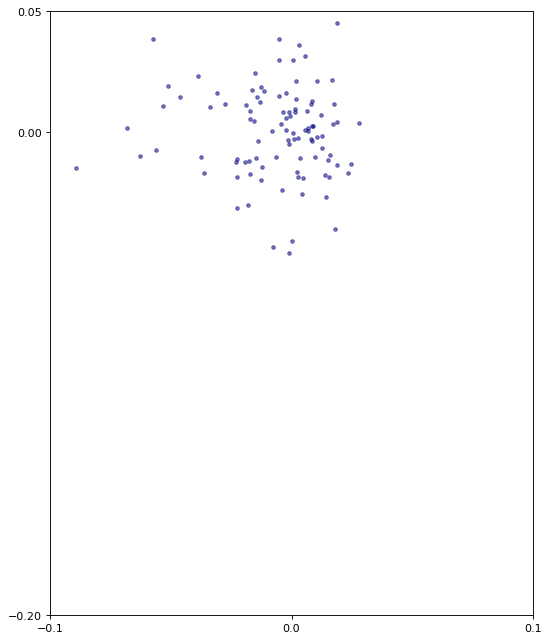

In [60]:
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = plt.subplot()

plt.scatter(X[0][75],Y[0][75], c = "navy",s=10, alpha=0.5)
ax.set(xlim=(-0.10, 0.10), ylim=(-0.20, 0.05))
ax.set_aspect('equal', 'box')
ax.set_xticks([-0.10, 0, 0.10])
ax.set_yticks([-0.20, 0, 0.05])
ax.set_facecolor('white')

plt.show()